<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190701yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import imutils


from IPython.display import display, Javascript

import os, sys
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
rm -rf /gdrive/My\ Drive/colabfiles/yolo3/

In [0]:
!mkdir /gdrive/My\ Drive/colabfiles/yolo3/

Ordner erstellen

In [3]:
cd /gdrive/My\ Drive/colabfiles/yolo3/


/gdrive/My Drive/colabfiles/yolo3


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
[[3]
 [1]
 [2]]


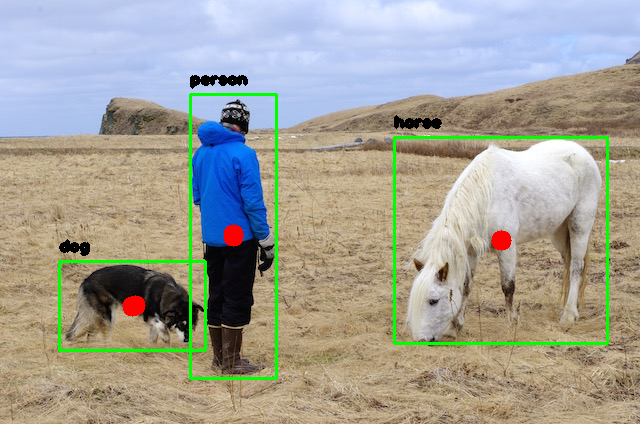

In [14]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
  
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
  
print(classes)

img = cv2.imread("person.jpg")
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

#showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      #object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      cv2.circle(img, (center_x, center_y), 10, (0,0,255), -1)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      
      #Rectangle Coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
            
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(img, (x, y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0), 3)
      
      
      
      


cv2_imshow(img)

In [0]:
cp /gdrive/My\ Drive/colabfiles/yolo/darknet/data/person.jpg /gdrive/My\ Drive/colabfiles/yolo3

In [0]:
cp /gdrive/My\ Drive/colabfiles/yolo/darknet/data/coco.names /gdrive/My\ Drive/colabfiles/yolo3

In [0]:
ls

coco.names  person.jpg  yolov3.cfg  yolov3.weights


Verzeichnis löschen

In [0]:
path ="/gdrive/My Drive/colabfiles/rcnnopencv/"
tf.gfile.DeleteRecursively(path)